<a href="https://colab.research.google.com/github/tolemy03/FARMHouse.Plantdisease/blob/main/resnet152v2_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall keras -y

In [ ]:
!pip install keras==2.15.0

In [ ]:
!pip install tensorflow==2.15.0

In [ ]:
import os
import numpy as np

import keras
import keras.backend as k
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from keras.models import Model

from keras.layers import Input, Activation, Dense, Flatten, Dropout
from keras.layers import add
from keras.applications import ResNet152V2

from keras.models import load_model

In [ ]:
train_dir = "/kaggle/input/plantleaf/train"
test_dir = "/kaggle/input/plantleaf/test"

In [ ]:
for root,dris,files in os.walk(train_dir):
  print(root,len(files))

/kaggle/input/plantleaf/train 0
/kaggle/input/plantleaf/train/Citrus_Canker 660
/kaggle/input/plantleaf/train/Citrus_Miner 261
/kaggle/input/plantleaf/train/Corn_Blight 430
/kaggle/input/plantleaf/train/Citrus_Healthy 649
/kaggle/input/plantleaf/train/Corn_Healthy 540
/kaggle/input/plantleaf/train/Potato_Late_blight 315
/kaggle/input/plantleaf/train/Tomato_Bacterial_spot 386
/kaggle/input/plantleaf/train/Potato_Healthy 300
/kaggle/input/plantleaf/train/Rice_BrownSpot 336
/kaggle/input/plantleaf/train/Tomato_healthy 389
/kaggle/input/plantleaf/train/Strawberry_Healthy 475
/kaggle/input/plantleaf/train/Strawberry_Leaf_Scorch 464
/kaggle/input/plantleaf/train/Jute_Healthy 437
/kaggle/input/plantleaf/train/Tomato_Early_blight 373
/kaggle/input/plantleaf/train/Jute_Cut_Worm_and_Mosaic 398
/kaggle/input/plantleaf/train/Potato_Early_Blight 397
/kaggle/input/plantleaf/train/Rice_LeafBlast 371
/kaggle/input/plantleaf/train/Tomato_Late_blight 376
/kaggle/input/plantleaf/train/Rice_Healthy 387
/k

In [ ]:
for root,dris,files in os.walk(test_dir):
  print(root,len(files))

/kaggle/input/plantleaf/test 0
/kaggle/input/plantleaf/test/Citrus_Canker 202
/kaggle/input/plantleaf/test/Citrus_Miner 138
/kaggle/input/plantleaf/test/Corn_Blight 196
/kaggle/input/plantleaf/test/Citrus_Healthy 182
/kaggle/input/plantleaf/test/Corn_Healthy 159
/kaggle/input/plantleaf/test/Potato_Late_blight 148
/kaggle/input/plantleaf/test/Tomato_Bacterial_spot 184
/kaggle/input/plantleaf/test/Potato_Healthy 166
/kaggle/input/plantleaf/test/Rice_BrownSpot 179
/kaggle/input/plantleaf/test/Tomato_healthy 166
/kaggle/input/plantleaf/test/Strawberry_Healthy 142
/kaggle/input/plantleaf/test/Strawberry_Leaf_Scorch 185
/kaggle/input/plantleaf/test/Jute_Healthy 170
/kaggle/input/plantleaf/test/Tomato_Early_blight 161
/kaggle/input/plantleaf/test/Jute_Cut_Worm_and_Mosaic 186
/kaggle/input/plantleaf/test/Potato_Early_Blight 196
/kaggle/input/plantleaf/test/Rice_LeafBlast 181
/kaggle/input/plantleaf/test/Tomato_Late_blight 164
/kaggle/input/plantleaf/test/Rice_Healthy 197
/kaggle/input/plantlea

In [ ]:
output_classes = 20
batch_size = 32
img_height, img_width = 224,224
input_shape = (img_height, img_width, 3)
epochs = 50

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (img_height,img_width),
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    class_mode = "categorical")

Found 8267 images belonging to 20 classes.


In [ ]:
train_generator.class_indices

{'Citrus_Canker': 0,
 'Citrus_Healthy': 1,
 'Citrus_Miner': 2,
 'Corn_Blight': 3,
 'Corn_Healthy': 4,
 'Jute_Black_Band_and_Mosaic': 5,
 'Jute_Cut_Worm_and_Mosaic': 6,
 'Jute_Healthy': 7,
 'Potato_Early_Blight': 8,
 'Potato_Healthy': 9,
 'Potato_Late_blight': 10,
 'Rice_BrownSpot': 11,
 'Rice_Healthy': 12,
 'Rice_LeafBlast': 13,
 'Strawberry_Healthy': 14,
 'Strawberry_Leaf_Scorch': 15,
 'Tomato_Bacterial_spot': 16,
 'Tomato_Early_blight': 17,
 'Tomato_Late_blight': 18,
 'Tomato_healthy': 19}

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (img_height,img_width),
                                                  batch_size = batch_size,
                                                  shuffle = False,
                                                  class_mode = "categorical")

Found 3479 images belonging to 20 classes.


In [ ]:
test_generator.class_indices

{'Citrus_Canker': 0,
 'Citrus_Healthy': 1,
 'Citrus_Miner': 2,
 'Corn_Blight': 3,
 'Corn_Healthy': 4,
 'Jute_Black_Band_and_Mosaic': 5,
 'Jute_Cut_Worm_and_Mosaic': 6,
 'Jute_Healthy': 7,
 'Potato_Early_Blight': 8,
 'Potato_Healthy': 9,
 'Potato_Late_blight': 10,
 'Rice_BrownSpot': 11,
 'Rice_Healthy': 12,
 'Rice_LeafBlast': 13,
 'Strawberry_Healthy': 14,
 'Strawberry_Leaf_Scorch': 15,
 'Tomato_Bacterial_spot': 16,
 'Tomato_Early_blight': 17,
 'Tomato_Late_blight': 18,
 'Tomato_healthy': 19}

In [ ]:
from keras.models import Sequential

In [ ]:
model = Sequential()

model.add(ResNet152V2(input_shape=input_shape, weights="imagenet", include_top=False, pooling="avg"))
model.add(Dropout(rate=0.5))
model.add(Dense(units=output_classes, activation="softmax"))

model.layers[0].trainable = False

234545216/234545216 [==============================] - 12s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate = 0.0001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152v2 (Functional)    (None, 2048)              58331648  
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 20)                40980     
                                                                 
Total params: 58372628 (222.67 MB)
Trainable params: 40980 (160.08 KB)
Non-trainable params: 58331648 (222.52 MB)
_________________________________________________________________


In [ ]:
!pip install visualkeras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 27.4 MB/s eta 0:00:0000:01


/opt/conda/lib/python3.10/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


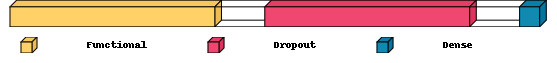

In [ ]:
import visualkeras

visualkeras.layered_view(model)
visualkeras.layered_view(model, legend=True, draw_volume=True, spacing=50)

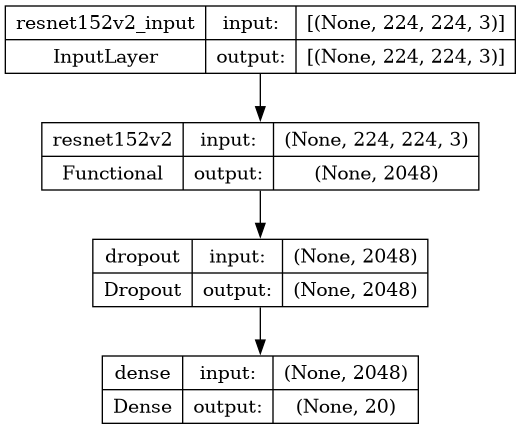

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

model_path = "/kaggle/working/ResNet152V2.h5"
checkpoint = ModelCheckpoint(model_path, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

early_stopping = EarlyStopping(monitor='val_accuracy', patience=99, restore_best_weights=True)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
model_hist = model.fit(train_generator,
                       steps_per_epoch = len(train_generator),
                       epochs = epochs,
                       verbose = 1,
                       validation_data = test_generator,
                       validation_steps = len(test_generator),
                       callbacks=callbacks_list)

Epoch 1/50
  1/259 [..............................] - ETA: 56:07 - loss: 4.0915 - accuracy: 0.0312

I0000 00:00:1724594307.653303     190 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


259/259 [==============================] - ETA: 0s - loss: 2.6669 - accuracy: 0.2382
Epoch 1: val_accuracy improved from -inf to 0.54355, saving model to /kaggle/working/ResNet152V2.h5


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


259/259 [==============================] - 252s 925ms/step - loss: 2.6669 - accuracy: 0.2382 - val_loss: 1.4515 - val_accuracy: 0.5435
Epoch 2/50
259/259 [==============================] - ETA: 0s - loss: 1.5831 - accuracy: 0.4790
Epoch 2: val_accuracy improved from 0.54355 to 0.71975, saving model to /kaggle/working/ResNet152V2.h5
259/259 [==============================] - 194s 748ms/step - loss: 1.5831 - accuracy: 0.4790 - val_loss: 0.9416 - val_accuracy: 0.7197
Epoch 3/50
259/259 [==============================] - ETA: 0s - loss: 1.1678 - accuracy: 0.5991
Epoch 3: val_accuracy improved from 0.71975 to 0.77896, saving model to /kaggle/working/ResNet152V2.h5
259/259 [==============================] - 193s 744ms/step - loss: 1.1678 - accuracy: 0.5991 - val_loss: 0.7421 - val_accuracy: 0.7790
Epoch 4/50
259/259 [==============================] - ETA: 0s - loss: 0.9494 - accuracy: 0.6710
Epoch 4: val_accuracy improved from 0.77896 to 0.81891, saving model to /kaggle/working/ResNet152V2.h

In [ ]:
import matplotlib.pyplot as plt

/tmp/ipykernel_104/1137683778.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


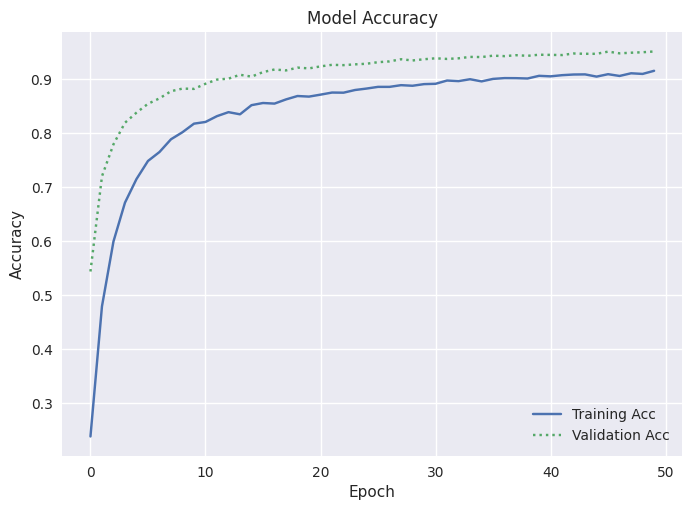

In [ ]:
plt.style.use("seaborn")
plt.plot(model_hist.history["accuracy"])
plt.plot(model_hist.history["val_accuracy"],":")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training Acc","Validation Acc"], loc="lower right")
plt.show()

/tmp/ipykernel_104/3697672577.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


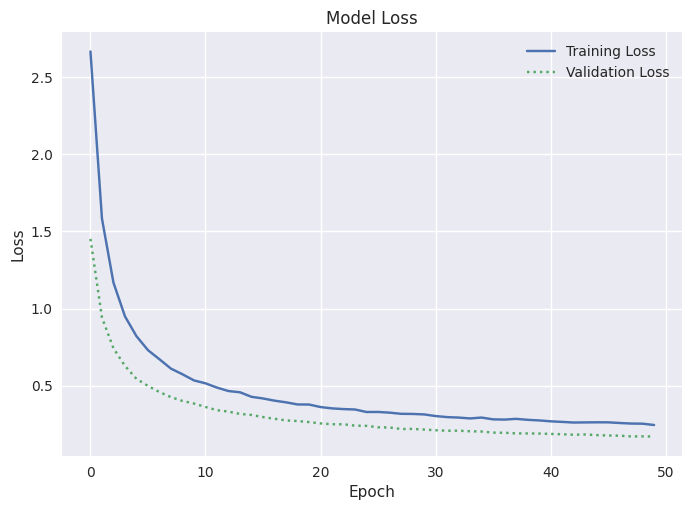

In [ ]:
plt.style.use("seaborn")
plt.plot(model_hist.history["loss"])
plt.plot(model_hist.history["val_loss"],":")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss","Validation Loss"], loc="upper right")
plt.show()

In [ ]:
filename = test_generator.filenames
truth = test_generator.classes
label = test_generator.class_indices
indexlabel = dict((value, key) for key, value in label.items())

predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose = 1)
predict_class = np.argmax(predicts, axis=1)
errors = np.where(predict_class != truth)[0]
print("No of errors = {}/{}".format(len(errors),test_generator.samples))

/tmp/ipykernel_104/573469936.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predicts = model.predict_generator(test_generator, steps=test_generator.samples/test_generator.batch_size, verbose = 1)


108/108 [==============================] - 30s 254ms/step
No of errors = 171/3479


Confusion Matrix
[[196   2   3   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  2 180   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [ 22   0 115   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0
    0   0]
 [  0   0   0 196   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0 159   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   0   0   0   0 165  11   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   6 180   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0 170   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 181   2  13   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   4 161   0   0   0   0   0   0   0   0
    0   1]
 [  0   0   0   0   0   0   0   0  13   0 134   0   0   0   0   0   0   0
    1   0]
 [  0   0   0   0   0   0   0   0   0   0   0 15

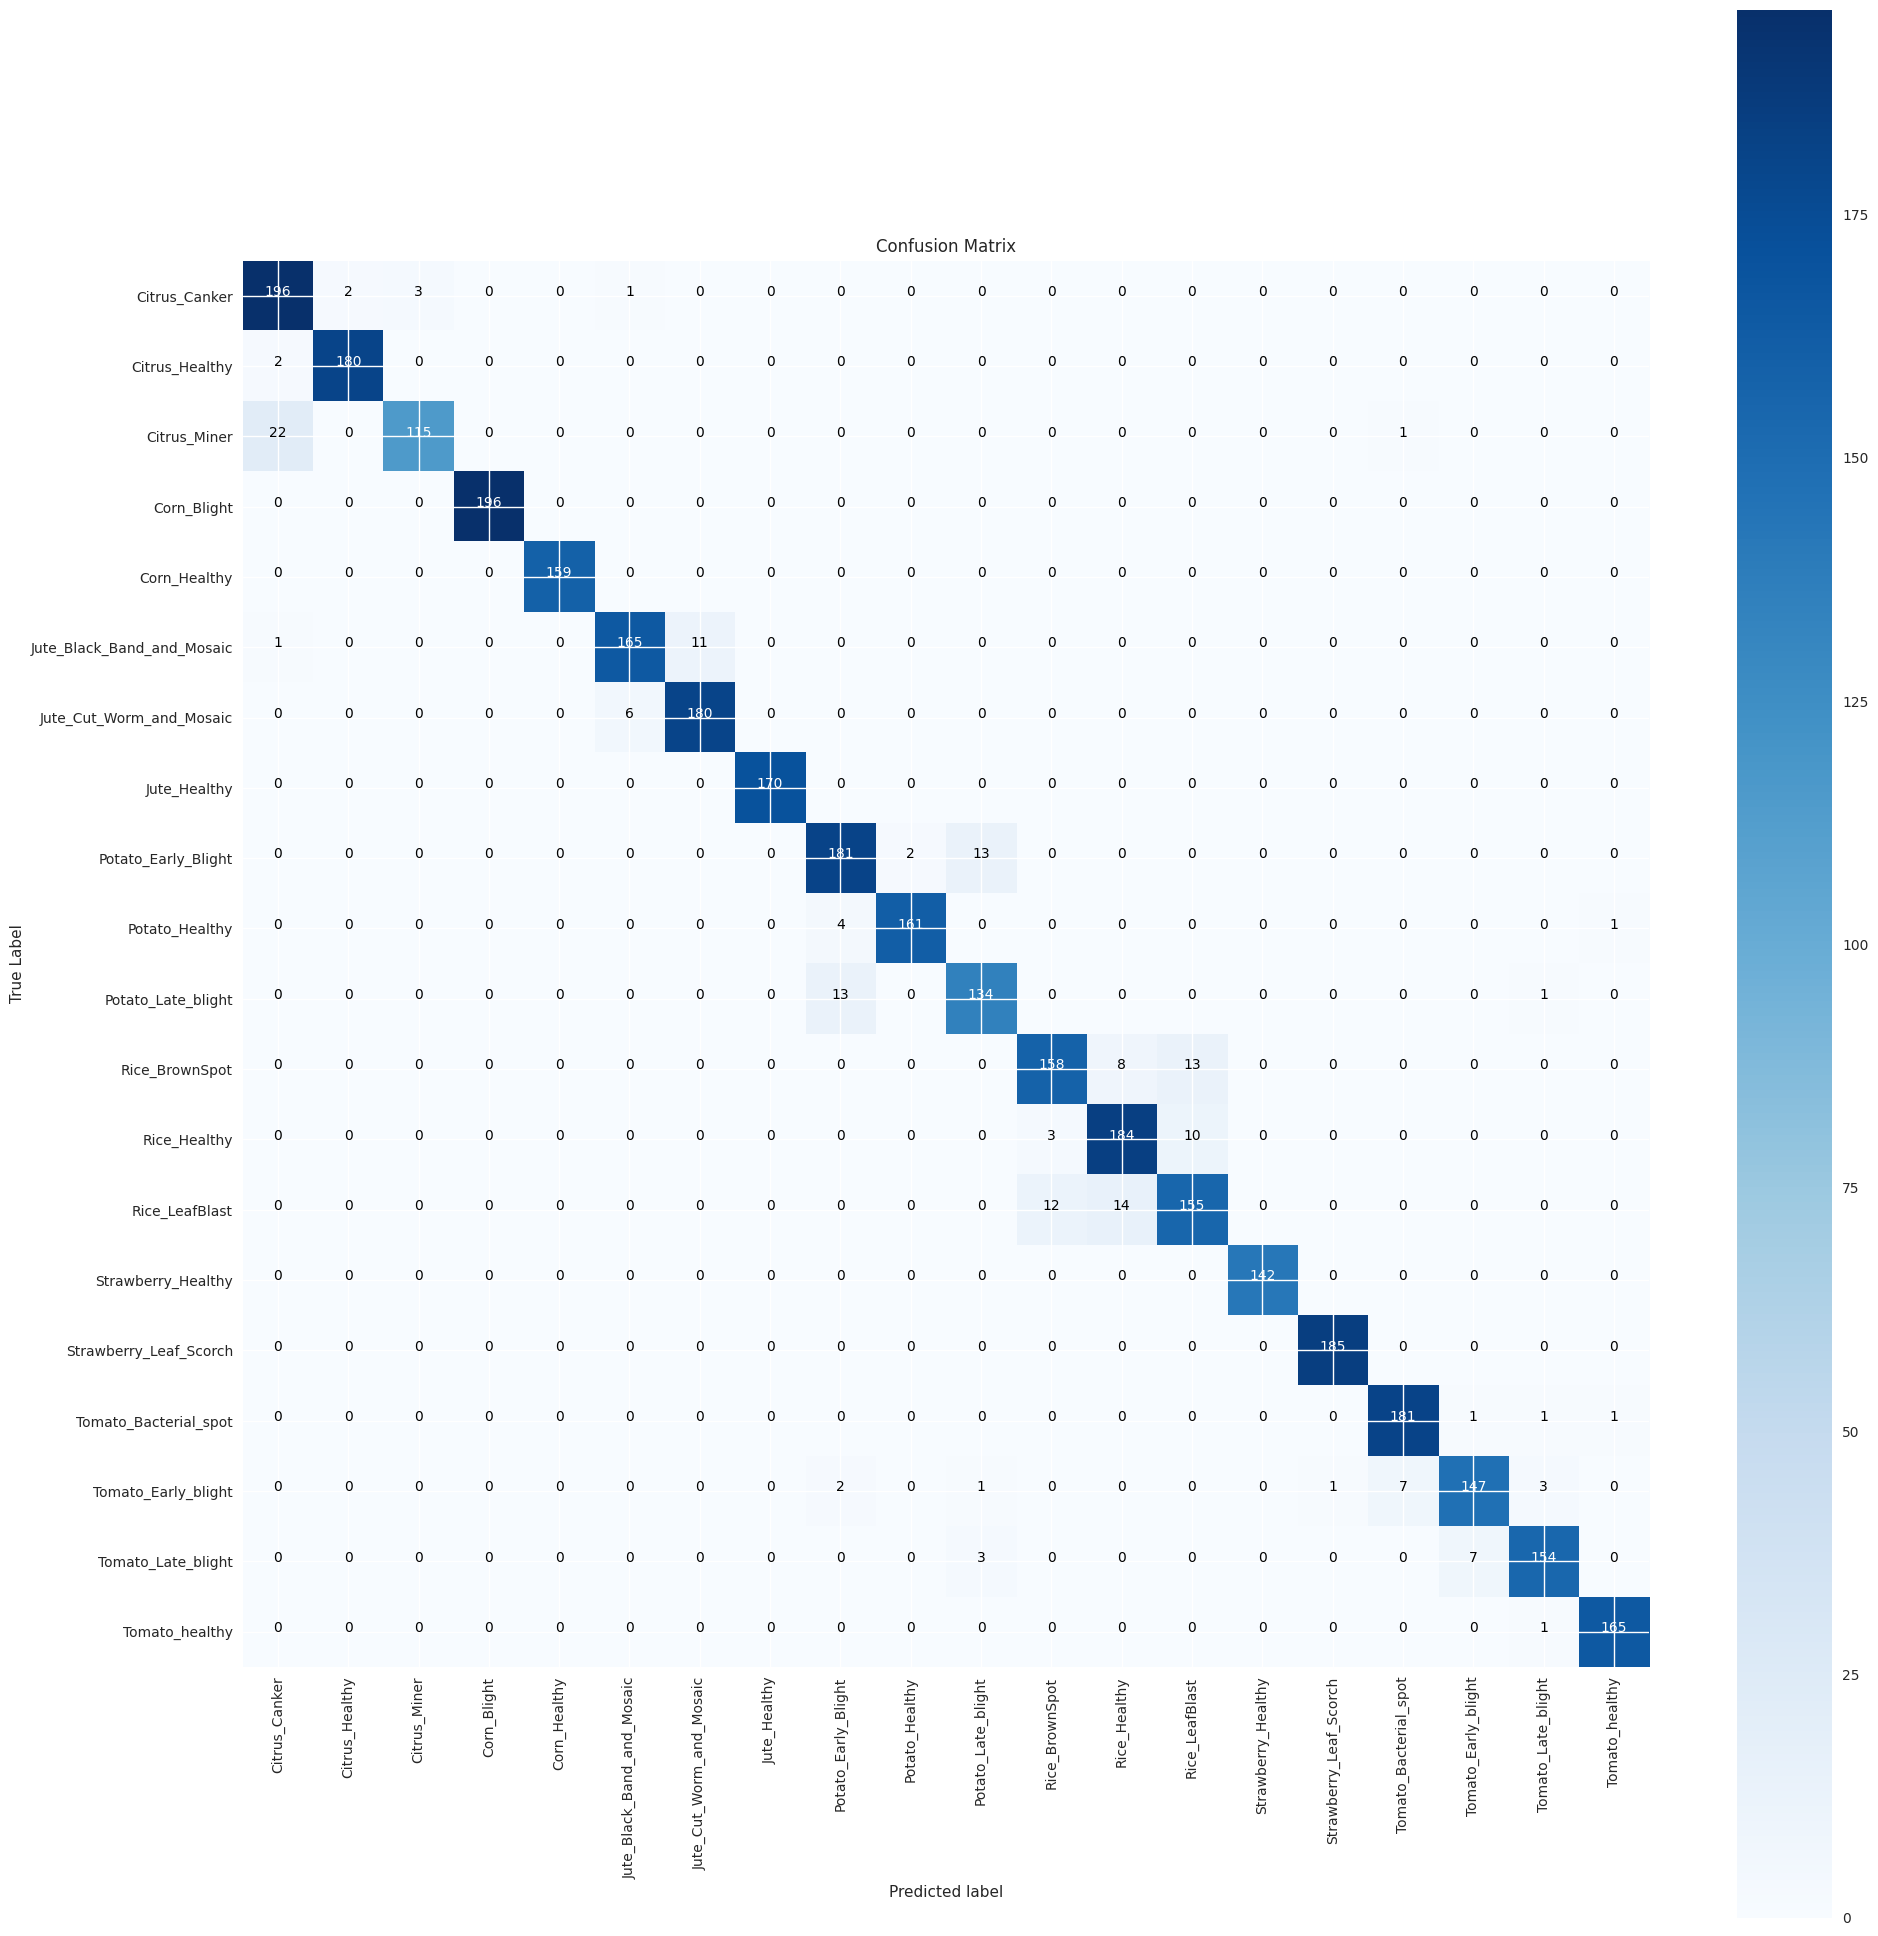

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(truth, predict_class)

labels = []
for k,v in indexlabel.items():
  labels.append(v)

import itertools
def plot_confusion_matrix(cm,
                          classes,
                          normalize = False,
                          title = "Confusion Matrix",
                          cmap = plt.cm.Blues):
  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if normalize:
    cm = cm.astype("float") / cm.sum(axis - 1)[:, np.newaxis]
    print("Normalize confusion matrix")
  else:
    print("Confusion Matrix")

  print(cm)

  plt.imshow(cm, interpolation="nearest",cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)
  fmt = ".2f" if normalize else "d"
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white" if cm[i,j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted label")

plt.figure(figsize=(20,20))

plot_confusion_matrix(cm,classes=labels,title="Confusion Matrix")




In [ ]:
from sklearn.metrics import classification_report
y_pred = predicts
y_pred_probability = y_pred

y_pred = np.argmax(y_pred, axis=1)
y_actual = test_generator.classes

classnames = []

for classname in test_generator.class_indices:
  classnames.append(classname)

target_names = classnames
print(classification_report(y_actual, y_pred, target_names = target_names))

                            precision    recall  f1-score   support

             Citrus_Canker       0.89      0.97      0.93       202
            Citrus_Healthy       0.99      0.99      0.99       182
              Citrus_Miner       0.97      0.83      0.90       138
               Corn_Blight       1.00      1.00      1.00       196
              Corn_Healthy       1.00      1.00      1.00       159
Jute_Black_Band_and_Mosaic       0.96      0.93      0.95       177
  Jute_Cut_Worm_and_Mosaic       0.94      0.97      0.95       186
              Jute_Healthy       1.00      1.00      1.00       170
       Potato_Early_Blight       0.91      0.92      0.91       196
            Potato_Healthy       0.99      0.97      0.98       166
        Potato_Late_blight       0.89      0.91      0.90       148
            Rice_BrownSpot       0.91      0.88      0.90       179
              Rice_Healthy       0.89      0.93      0.91       197
            Rice_LeafBlast       0.87      0.86